# Google Data Analytics Certificate's Capstone Project
### Bellabeat data analysis case study

**INTRODUCTION**

Bellabeat is a high-tech manufacturer of health-focused products for women. Bellabeat is a successful small company, but they have the potential to become a larger player in the global smart device market. Bellabeat believes that analyzing smart device fitness data could help unlock new growth opportunities for the company. We have been asked to focus on one of Bellabeat’s products and analyze smart device data to gain insight into how consumers are using their smart devices. The insights you discover will then help guide marketing strategy for the company. Their Products include:

* **Bellabeat app:** The Bellabeat app provides users with health data related to their activity, sleep, stress, menstrual cycle, and mindfulness habits.
* **Leaf:** Bellabeat’s classic wellness tracker can be worn as a bracelet, necklace, or clip. The Leaf tracker connects to the Bellabeat app to track activity, sleep, and stress.
* **Time:** This wellness watch track user activity, sleep, and stress. The Time watch connects to the Bellabeat app to provide you with insights into your daily wellness.
* **Spring:** This is a water bottle that tracks daily water to ensure that you are appropriately hydrated throughout the day. The Spring bottle connects to the Bellabeat app to track your hydration levels.
* **Bellabeat membership:** Membership gives users 24/7 access to fully personalized guidance on nutrition, activity, sleep, health and beauty, and mindfulness based on their lifestyle and goals.

### 1.Ask 

#### Key Stakeholders
* Urška Sršen - Bellabeat's cofounder and Chief Creative Officer
* Sando Mur - Mathematician and Bellabeat's co-founder.

**Business Task** : To analyze smart device usage data to gain insight into how consumers use non-Bellabeat smart devices. Based on insights, select one Bellabeat product which makes the user more inclusive to use and stay healthy. Make high-level recommendations for how these trends or insights help Bellabeat marketing team craft new strategies.

Guiding questions:
* What are some trends in smart device usage?
* How could these trends apply to Bellabeat customers?
* How could these trends help influence Bellabeat marketing startegy?

Installing packages required.

In [1]:
# install.packages("tidyverse")
# install.packages("dplyr")
# install.packages("tidyr")
# install.packages("readr")
# install.packages("lubridate")
# install.packages("ggplot2")

Importing libraries.

In [2]:
library(tidyverse)
library(ggplot2)
library(readr)
library(dplyr)
library(lubridate)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.4     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




### 2. Prepare
For this case study, we use data that is available in public. [FitBit Fitness Tracker Data](https://www.kaggle.com/arashnic/fitbit) (CC0: Public Domain, dataset made available through Mobius): This Kaggle data set
contains personal fitness tracker from thirty fitbit users. Thirty eligible Fitbit users consented to the submission of
personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. It includes
information about daily activity, steps, and heart rate that can be used to explore users’ habits.

After a quick check on all data files through Google sheets, we have selected few datasets which would cover big picture of user's health and which has sufficient data to consider like 
* Daily activities which shows a gradual trend of user's activity through days or week.
* Sleep is important and having tracking data of it will help us suggest user to get sufficient sleep time .
* Weight, hourly data of intensities and calories are selected to find any patterns which would be helpful and know the story.

In this phase, we organise the data and perform sort and fliter operations as per requirement.

In [3]:
daily_Activity <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
daily_calories <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv")
daily_intensity <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv")
daily_steps <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv")
sleep_day <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
minute_sleep <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteSleep_merged.csv")
weight_log <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")
hourly_intensity <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")
hourly_calories <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv")
hourly_steps <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")


── Column specification ────────────────────────────────────────────────────────
cols(
  Id = col_double(),
  ActivityDate = col_character(),
  TotalSteps = col_double(),
  TotalDistance = col_double(),
  TrackerDistance = col_double(),
  LoggedActivitiesDistance = col_double(),
  VeryActiveDistance = col_double(),
  ModeratelyActiveDistance = col_double(),
  LightActiveDistance = col_double(),
  SedentaryActiveDistance = col_double(),
  VeryActiveMinutes = col_double(),
  FairlyActiveMinutes = col_double(),
  LightlyActiveMinutes = col_double(),
  SedentaryMinutes = col_double(),
  Calories = col_double()
)



── Column specification ────────────────────────────────────────────────────────
cols(
  Id = col_double(),
  ActivityDay = col_character(),
  Calories = col_double()
)



── Column specification ────────────────────────────────────────────────────────
cols(
  Id = col_double(),
  ActivityDay = col_character(),
  SedentaryMinutes = col_double(),
  LightlyActiveMinutes = col_dou

The user_ids being primary key, selecting appropriate datasets to merge to do analysis with proper number of users. Given the data consists of 30 user's tracking data. Population is small enough to consider for analysis. Although they don't represent all sections of people (e.g: male).

Checking number of unique users in each dataframe.

In [4]:
n_distinct(daily_Activity$Id)
n_distinct(daily_calories$Id)
n_distinct(daily_intensity$Id)
n_distinct(daily_steps$Id)
n_distinct(sleep_day$Id)
n_distinct(minute_sleep$Id)
n_distinct(weight_log$Id)
n_distinct(hourly_intensity$Id)
n_distinct(hourly_calories$Id)
n_distinct(hourly_steps$Id)

[1] 33

[1] 33

[1] 33

[1] 33

[1] 24

[1] 24

[1] 8

[1] 33

[1] 33

[1] 33

Now that all data was processed, we are able to see min(date) and max(date) and n_distinct(df$id) for each data frame:
* daily_activity data available for 2016-04-12 and 2016-05-12 with 33 unique IDs.
* hourly_activity data available for 2016-04-12 and 2016-05-12 with with 33 unique Ids.
* sleep data available for 2016-04-12 and 2016-05-12 with with 24 unique Ids.
* weight_log data available for 2016-04-12 and 2016-05-12 with with 8 unique Ids.


Only 24% and 73% of users are willing to track weight and sleep time respectively. 

In [5]:
# Looking at first few rows
head(daily_Activity) 
# Data types of columns 
str(daily_Activity)

head(daily_calories)
str(daily_calories)

head(daily_intensity)
str(daily_intensity)

head(daily_steps)
str(daily_steps)

head(sleep_day)
str(sleep_day)

head(minute_sleep)
str(minute_sleep)

head(weight_log)
str(weight_log)

head(hourly_intensity)
str(hourly_intensity)

head(hourly_calories)
str(hourly_calories)

head(hourly_steps)
str(hourly_steps)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


spec_tbl_df [940 × 15] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id                      : num [1:940] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate            : chr [1:940] "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ TotalSteps              : num [1:940] 13162 10735 10460 9762 12669 ...
 $ TotalDistance           : num [1:940] 8.5 6.97 6.74 6.28 8.16 ...
 $ TrackerDistance         : num [1:940] 8.5 6.97 6.74 6.28 8.16 ...
 $ LoggedActivitiesDistance: num [1:940] 0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num [1:940] 1.88 1.57 2.44 2.14 2.71 ...
 $ ModeratelyActiveDistance: num [1:940] 0.55 0.69 0.4 1.26 0.41 ...
 $ LightActiveDistance     : num [1:940] 6.06 4.71 3.91 2.83 5.04 ...
 $ SedentaryActiveDistance : num [1:940] 0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : num [1:940] 25 21 30 29 36 38 42 50 28 19 ...
 $ FairlyActiveMinutes     : num [1:940] 13 19 11 34 10 20 16 31 12 8 ...
 $ LightlyActiveMinutes    : num [1:940] 328 217 181 209 22

Id,ActivityDay,Calories
<dbl>,<chr>,<dbl>
1503960366,4/12/2016,1985
1503960366,4/13/2016,1797
1503960366,4/14/2016,1776
1503960366,4/15/2016,1745
1503960366,4/16/2016,1863
1503960366,4/17/2016,1728


spec_tbl_df [940 × 3] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id         : num [1:940] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDay: chr [1:940] "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ Calories   : num [1:940] 1985 1797 1776 1745 1863 ...
 - attr(*, "spec")=
  .. cols(
  ..   Id = col_double(),
  ..   ActivityDay = col_character(),
  ..   Calories = col_double()
  .. )


Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,728,328,13,25,0,6.06,0.55,1.88
1503960366,4/13/2016,776,217,19,21,0,4.71,0.69,1.57
1503960366,4/14/2016,1218,181,11,30,0,3.91,0.40,2.44
1503960366,4/15/2016,726,209,34,29,0,2.83,1.26,2.14
1503960366,4/16/2016,773,221,10,36,0,5.04,0.41,2.71
1503960366,4/17/2016,539,164,20,38,0,2.51,0.78,3.19


spec_tbl_df [940 × 10] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id                      : num [1:940] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDay             : chr [1:940] "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ SedentaryMinutes        : num [1:940] 728 776 1218 726 773 ...
 $ LightlyActiveMinutes    : num [1:940] 328 217 181 209 221 164 233 264 205 211 ...
 $ FairlyActiveMinutes     : num [1:940] 13 19 11 34 10 20 16 31 12 8 ...
 $ VeryActiveMinutes       : num [1:940] 25 21 30 29 36 38 42 50 28 19 ...
 $ SedentaryActiveDistance : num [1:940] 0 0 0 0 0 0 0 0 0 0 ...
 $ LightActiveDistance     : num [1:940] 6.06 4.71 3.91 2.83 5.04 ...
 $ ModeratelyActiveDistance: num [1:940] 0.55 0.69 0.4 1.26 0.41 ...
 $ VeryActiveDistance      : num [1:940] 1.88 1.57 2.44 2.14 2.71 ...
 - attr(*, "spec")=
  .. cols(
  ..   Id = col_double(),
  ..   ActivityDay = col_character(),
  ..   SedentaryMinutes = col_double(),
  ..   LightlyActiveMinutes = col_double(),
  ..  

Id,ActivityDay,StepTotal
<dbl>,<chr>,<dbl>
1503960366,4/12/2016,13162
1503960366,4/13/2016,10735
1503960366,4/14/2016,10460
1503960366,4/15/2016,9762
1503960366,4/16/2016,12669
1503960366,4/17/2016,9705


spec_tbl_df [940 × 3] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id         : num [1:940] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDay: chr [1:940] "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ StepTotal  : num [1:940] 13162 10735 10460 9762 12669 ...
 - attr(*, "spec")=
  .. cols(
  ..   Id = col_double(),
  ..   ActivityDay = col_character(),
  ..   StepTotal = col_double()
  .. )


Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320


spec_tbl_df [413 × 5] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id                : num [1:413] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ SleepDay          : chr [1:413] "4/12/2016 12:00:00 AM" "4/13/2016 12:00:00 AM" "4/15/2016 12:00:00 AM" "4/16/2016 12:00:00 AM" ...
 $ TotalSleepRecords : num [1:413] 1 2 1 2 1 1 1 1 1 1 ...
 $ TotalMinutesAsleep: num [1:413] 327 384 412 340 700 304 360 325 361 430 ...
 $ TotalTimeInBed    : num [1:413] 346 407 442 367 712 320 377 364 384 449 ...
 - attr(*, "spec")=
  .. cols(
  ..   Id = col_double(),
  ..   SleepDay = col_character(),
  ..   TotalSleepRecords = col_double(),
  ..   TotalMinutesAsleep = col_double(),
  ..   TotalTimeInBed = col_double()
  .. )


Id,date,value,logId
<dbl>,<chr>,<dbl>,<dbl>
1503960366,4/12/2016 2:47:30 AM,3,11380564589
1503960366,4/12/2016 2:48:30 AM,2,11380564589
1503960366,4/12/2016 2:49:30 AM,1,11380564589
1503960366,4/12/2016 2:50:30 AM,1,11380564589
1503960366,4/12/2016 2:51:30 AM,1,11380564589
1503960366,4/12/2016 2:52:30 AM,1,11380564589


spec_tbl_df [188,521 × 4] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id   : num [1:188521] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ date : chr [1:188521] "4/12/2016 2:47:30 AM" "4/12/2016 2:48:30 AM" "4/12/2016 2:49:30 AM" "4/12/2016 2:50:30 AM" ...
 $ value: num [1:188521] 3 2 1 1 1 1 1 2 2 2 ...
 $ logId: num [1:188521] 1.14e+10 1.14e+10 1.14e+10 1.14e+10 1.14e+10 ...
 - attr(*, "spec")=
  .. cols(
  ..   Id = col_double(),
  ..   date = col_character(),
  ..   value = col_double(),
  ..   logId = col_double()
  .. )


Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,TRUE,1.462234e+12
1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,TRUE,1.462320e+12
1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,FALSE,1.460510e+12
2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,NA,21.45,TRUE,1.461283e+12
2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,NA,21.69,TRUE,1.463098e+12
4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,25,27.45,TRUE,1.460938e+12


spec_tbl_df [67 × 8] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id            : num [1:67] 1.50e+09 1.50e+09 1.93e+09 2.87e+09 2.87e+09 ...
 $ Date          : chr [1:67] "5/2/2016 11:59:59 PM" "5/3/2016 11:59:59 PM" "4/13/2016 1:08:52 AM" "4/21/2016 11:59:59 PM" ...
 $ WeightKg      : num [1:67] 52.6 52.6 133.5 56.7 57.3 ...
 $ WeightPounds  : num [1:67] 116 116 294 125 126 ...
 $ Fat           : num [1:67] 22 NA NA NA NA 25 NA NA NA NA ...
 $ BMI           : num [1:67] 22.6 22.6 47.5 21.5 21.7 ...
 $ IsManualReport: logi [1:67] TRUE TRUE FALSE TRUE TRUE TRUE ...
 $ LogId         : num [1:67] 1.46e+12 1.46e+12 1.46e+12 1.46e+12 1.46e+12 ...
 - attr(*, "spec")=
  .. cols(
  ..   Id = col_double(),
  ..   Date = col_character(),
  ..   WeightKg = col_double(),
  ..   WeightPounds = col_double(),
  ..   Fat = col_double(),
  ..   BMI = col_double(),
  ..   IsManualReport = col_logical(),
  ..   LogId = col_double()
  .. )


Id,ActivityHour,TotalIntensity,AverageIntensity
<dbl>,<chr>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,20,0.333333
1503960366,4/12/2016 1:00:00 AM,8,0.133333
1503960366,4/12/2016 2:00:00 AM,7,0.116667
1503960366,4/12/2016 3:00:00 AM,0,0.000000
1503960366,4/12/2016 4:00:00 AM,0,0.000000
1503960366,4/12/2016 5:00:00 AM,0,0.000000


spec_tbl_df [22,099 × 4] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id              : num [1:22099] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityHour    : chr [1:22099] "4/12/2016 12:00:00 AM" "4/12/2016 1:00:00 AM" "4/12/2016 2:00:00 AM" "4/12/2016 3:00:00 AM" ...
 $ TotalIntensity  : num [1:22099] 20 8 7 0 0 0 0 0 13 30 ...
 $ AverageIntensity: num [1:22099] 0.333 0.133 0.117 0 0 ...
 - attr(*, "spec")=
  .. cols(
  ..   Id = col_double(),
  ..   ActivityHour = col_character(),
  ..   TotalIntensity = col_double(),
  ..   AverageIntensity = col_double()
  .. )


Id,ActivityHour,Calories
<dbl>,<chr>,<dbl>
1503960366,4/12/2016 12:00:00 AM,81
1503960366,4/12/2016 1:00:00 AM,61
1503960366,4/12/2016 2:00:00 AM,59
1503960366,4/12/2016 3:00:00 AM,47
1503960366,4/12/2016 4:00:00 AM,48
1503960366,4/12/2016 5:00:00 AM,48


spec_tbl_df [22,099 × 3] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id          : num [1:22099] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityHour: chr [1:22099] "4/12/2016 12:00:00 AM" "4/12/2016 1:00:00 AM" "4/12/2016 2:00:00 AM" "4/12/2016 3:00:00 AM" ...
 $ Calories    : num [1:22099] 81 61 59 47 48 48 48 47 68 141 ...
 - attr(*, "spec")=
  .. cols(
  ..   Id = col_double(),
  ..   ActivityHour = col_character(),
  ..   Calories = col_double()
  .. )


Id,ActivityHour,StepTotal
<dbl>,<chr>,<dbl>
1503960366,4/12/2016 12:00:00 AM,373
1503960366,4/12/2016 1:00:00 AM,160
1503960366,4/12/2016 2:00:00 AM,151
1503960366,4/12/2016 3:00:00 AM,0
1503960366,4/12/2016 4:00:00 AM,0
1503960366,4/12/2016 5:00:00 AM,0


spec_tbl_df [22,099 × 3] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id          : num [1:22099] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityHour: chr [1:22099] "4/12/2016 12:00:00 AM" "4/12/2016 1:00:00 AM" "4/12/2016 2:00:00 AM" "4/12/2016 3:00:00 AM" ...
 $ StepTotal   : num [1:22099] 373 160 151 0 0 ...
 - attr(*, "spec")=
  .. cols(
  ..   Id = col_double(),
  ..   ActivityHour = col_character(),
  ..   StepTotal = col_double()
  .. )


Since daily activities like calories, intensities and steps are already merged in **daily_Activity** dataframe. Considering **daily_Activity** data for further analysis. Likewise, merging hourly activity data into one dataframe for simplicity.

In [6]:
hourly_Activity <- Reduce(merge,list(hourly_calories, hourly_intensity, hourly_steps))

sum(is.na(hourly_Activity))
head(hourly_Activity)
str(hourly_Activity)

[1] 0

,Id,ActivityHour,Calories,TotalIntensity,AverageIntensity,StepTotal
,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,1503960366,4/12/2016 1:00:00 AM,61,8,0.133333,160
2,1503960366,4/12/2016 1:00:00 PM,66,6,0.100000,221
3,1503960366,4/12/2016 10:00:00 AM,99,29,0.483333,676
4,1503960366,4/12/2016 10:00:00 PM,65,9,0.150000,89
5,1503960366,4/12/2016 11:00:00 AM,76,12,0.200000,360
6,1503960366,4/12/2016 11:00:00 PM,81,21,0.350000,338


'data.frame':	22099 obs. of  6 variables:
 $ Id              : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityHour    : chr  "4/12/2016 1:00:00 AM" "4/12/2016 1:00:00 PM" "4/12/2016 10:00:00 AM" "4/12/2016 10:00:00 PM" ...
 $ Calories        : num  61 66 99 65 76 81 81 73 59 110 ...
 $ TotalIntensity  : num  8 6 29 9 12 21 20 11 7 36 ...
 $ AverageIntensity: num  0.133 0.1 0.483 0.15 0.2 ...
 $ StepTotal       : num  160 221 676 89 360 ...


### 3.Process

In this phase, we check for errors in data, format data to use effectively. Cleaning and manipulation techniques will be performed to make data work for further analysis moe effectively.

Here, **ActivityHour** timestamps are in character type, converting into date-time format helps find any discountinuity in recording data.

In [7]:
# for daily activity
daily_Activity$ActivityDate <- as.POSIXct(daily_Activity$ActivityDate, format="%m/%d/%Y", tz=Sys.timezone())
daily_Activity$Date <- format(daily_Activity$ActivityDate,format = "%m/%d/%y")

# Similarly  for hourly activity
hourly_Activity$ActivityHour <- as.POSIXct(hourly_Activity$ActivityHour, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
hourly_Activity$Date <- format(hourly_Activity$ActivityHour,format = "%m/%d/%y")
hourly_Activity$Time <- format(hourly_Activity$ActivityHour,format = "%H" )
hourly_Activity$Day<-  weekdays(hourly_Activity$ActivityHour)

# For sleep day
sleep_day$SleepDay <- as.POSIXct(sleep_day$SleepDay, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
sleep_day$Date <- format(sleep_day$SleepDay,format = "%m/%d/%y")

In [8]:
# a quick check on changes on dates and time
head(daily_Activity)
head(sleep_day)
head(hourly_Activity)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Date
<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,04/12/16
1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,04/13/16
1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776,04/14/16
1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,04/15/16
1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,04/16/16
1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,04/17/16


Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Date
<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<chr>
1503960366,2016-04-12,1,327,346,04/12/16
1503960366,2016-04-13,2,384,407,04/13/16
1503960366,2016-04-15,1,412,442,04/15/16
1503960366,2016-04-16,2,340,367,04/16/16
1503960366,2016-04-17,1,700,712,04/17/16
1503960366,2016-04-19,1,304,320,04/19/16


,Id,ActivityHour,Calories,TotalIntensity,AverageIntensity,StepTotal,Date,Time,Day
,<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,1503960366,2016-04-12 01:00:00,61,8,0.133333,160,04/12/16,01,Tuesday
2,1503960366,2016-04-12 13:00:00,66,6,0.100000,221,04/12/16,13,Tuesday
3,1503960366,2016-04-12 10:00:00,99,29,0.483333,676,04/12/16,10,Tuesday
4,1503960366,2016-04-12 22:00:00,65,9,0.150000,89,04/12/16,22,Tuesday
5,1503960366,2016-04-12 11:00:00,76,12,0.200000,360,04/12/16,11,Tuesday
6,1503960366,2016-04-12 23:00:00,81,21,0.350000,338,04/12/16,23,Tuesday


Now, we have daily, hourly activities of 33 users and sleep records of 24 users. We can start exploring the cleaned and organized data to find patterns through some great visualizations.

### 4.Analyze
In this phase, we analyze data through aggregating useful features to draw some insights by plotting self-explanatory visualizations. 
Some tasks which include:
* Aggregating data.
* Formatting and creating useful data.
* Peforming calculations.
* Identifying trends and relationships.

In [9]:
# Daily activity summary on distance covered based on levels, steps and active minutes
print("Daily activity")
daily_Activity %>%
    select(VeryActiveDistance, ModeratelyActiveDistance, LightActiveDistance, SedentaryActiveDistance)%>%
    summary()
daily_Activity %>%
    select(TotalSteps, TotalDistance, TrackerDistance)%>%
    summary()
daily_Activity  %>%
    select(VeryActiveMinutes,FairlyActiveMinutes, LightlyActiveMinutes, SedentaryMinutes)%>%
    summary()

# Sleep records summary
print("sleep day")
sleep_day %>%
    select(TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed)%>%
    summary()

# Hourly activity summary on total steps 
print("Hourly activity")
hourly_Activity %>%
    select(Calories, TotalIntensity, StepTotal)%>%
    summary()


[1] "Daily activity"


 VeryActiveDistance ModeratelyActiveDistance LightActiveDistance
 Min.   : 0.000     Min.   :0.0000           Min.   : 0.000     
 1st Qu.: 0.000     1st Qu.:0.0000           1st Qu.: 1.945     
 Median : 0.210     Median :0.2400           Median : 3.365     
 Mean   : 1.503     Mean   :0.5675           Mean   : 3.341     
 3rd Qu.: 2.053     3rd Qu.:0.8000           3rd Qu.: 4.782     
 Max.   :21.920     Max.   :6.4800           Max.   :10.710     
 SedentaryActiveDistance
 Min.   :0.000000       
 1st Qu.:0.000000       
 Median :0.000000       
 Mean   :0.001606       
 3rd Qu.:0.000000       
 Max.   :0.110000       

   TotalSteps    TotalDistance    TrackerDistance 
 Min.   :    0   Min.   : 0.000   Min.   : 0.000  
 1st Qu.: 3790   1st Qu.: 2.620   1st Qu.: 2.620  
 Median : 7406   Median : 5.245   Median : 5.245  
 Mean   : 7638   Mean   : 5.490   Mean   : 5.475  
 3rd Qu.:10727   3rd Qu.: 7.713   3rd Qu.: 7.710  
 Max.   :36019   Max.   :28.030   Max.   :28.030  

 VeryActiveMinutes FairlyActiveMinutes LightlyActiveMinutes SedentaryMinutes
 Min.   :  0.00    Min.   :  0.00      Min.   :  0.0        Min.   :   0.0  
 1st Qu.:  0.00    1st Qu.:  0.00      1st Qu.:127.0        1st Qu.: 729.8  
 Median :  4.00    Median :  6.00      Median :199.0        Median :1057.5  
 Mean   : 21.16    Mean   : 13.56      Mean   :192.8        Mean   : 991.2  
 3rd Qu.: 32.00    3rd Qu.: 19.00      3rd Qu.:264.0        3rd Qu.:1229.5  
 Max.   :210.00    Max.   :143.00      Max.   :518.0        Max.   :1440.0  

[1] "sleep day"


 TotalSleepRecords TotalMinutesAsleep TotalTimeInBed 
 Min.   :1.000     Min.   : 58.0      Min.   : 61.0  
 1st Qu.:1.000     1st Qu.:361.0      1st Qu.:403.0  
 Median :1.000     Median :433.0      Median :463.0  
 Mean   :1.119     Mean   :419.5      Mean   :458.6  
 3rd Qu.:1.000     3rd Qu.:490.0      3rd Qu.:526.0  
 Max.   :3.000     Max.   :796.0      Max.   :961.0  

[1] "Hourly activity"


    Calories      TotalIntensity     StepTotal      
 Min.   : 42.00   Min.   :  0.00   Min.   :    0.0  
 1st Qu.: 63.00   1st Qu.:  0.00   1st Qu.:    0.0  
 Median : 83.00   Median :  3.00   Median :   40.0  
 Mean   : 97.39   Mean   : 12.04   Mean   :  320.2  
 3rd Qu.:108.00   3rd Qu.: 16.00   3rd Qu.:  357.0  
 Max.   :948.00   Max.   :180.00   Max.   :10554.0  

#### Findings from summaries:
* Average steps in day is found to be 7638. However, average of 10,000 steps is commonly recommended to stay fit. So, steps per day need to be maintained.
* 75% users are maintaining 10,000 steps per day according 3rd quartile stat of TotalSteps.
* Average Sedentary/Inactive Minutes per day is 991 minutes i.e., 16.5 hours which is 2/3rd of day. This needs to be reduced.(assuming sleep time may or maynot recorded)
* Total Time in bed is recorded average of 458.6 minutes i.e., 7.6 hours after sleep is quite too long if assumed user is not working on bed.


Before we start the analysis, we’ll set up a common theme for our plots.

In [10]:
custom_theme <- function() {
  theme(
    panel.border = element_rect(colour = "black", 
                                fill = NA, 
                                linetype = 1),
    panel.background = element_rect(fill = "white", 
                                    color = 'grey50'),
#     panel.grid.minor.y = element_blank(),
    axis.text = element_text(size=14,colour = "black", 
                             face = "italic", 
                             family = "Helvetica"),
    axis.title = element_text(size=16,colour = "black", 
                              family = "Helvetica"),
    axis.ticks = element_line(colour = "black"),
    plot.title = element_text(size=23, 
                              hjust = 0.5, 
                              family = "Helvetica"),
    plot.subtitle=element_text(size=18, 
                               hjust = 0.5),
    plot.caption = element_text(size=16,colour = "black", 
                             face = "italic", 
                             family = "Helvetica"),
    legend.text = element_text(size=14,colour = "black"),
    legend.title = element_text(size= 18,colour = "black")
  )
}

In [11]:
head(daily_Activity)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Date
<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,04/12/16
1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,04/13/16
1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776,04/14/16
1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,04/15/16
1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,04/16/16
1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,04/17/16


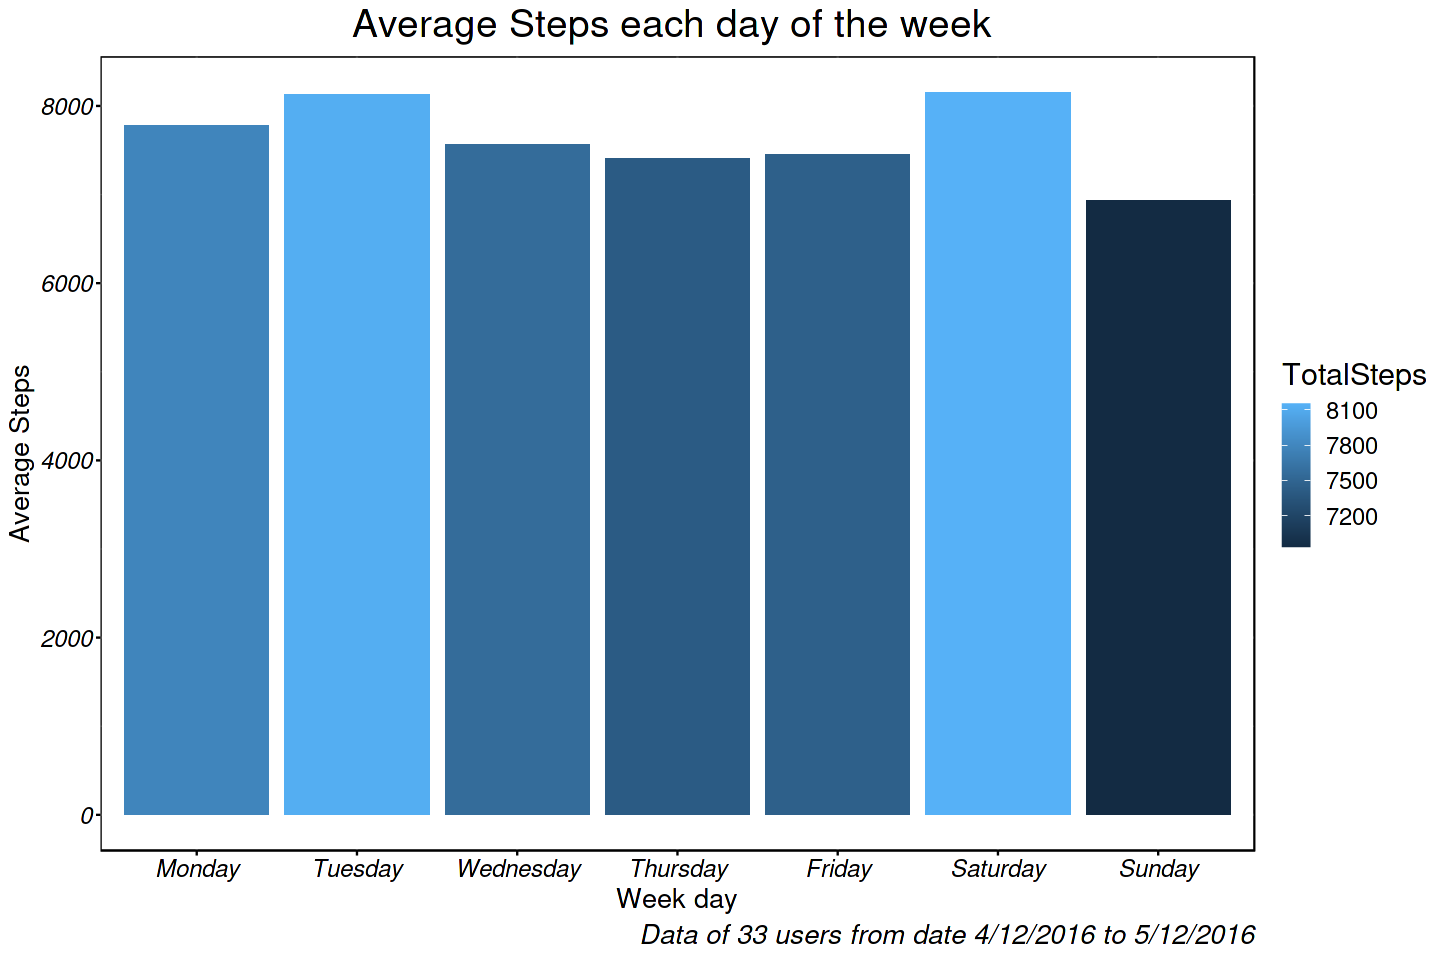

In [12]:
# visualizing no. of steps in a day 
options(repr.plot.width = 12, repr.plot.height = 8)
daily_Activity$weekday <- weekdays(as.Date(daily_Activity$Date,format="%m/%d/%Y"))
daily_Activity$weekday <- factor(daily_Activity$weekday, levels = c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday","Sunday"))
daily_Activity_group_steps <- daily_Activity %>%
  group_by(weekday) %>%
  drop_na() %>%
  summarise(mean_TotalSteps = mean(TotalSteps))

ggplot(data = daily_Activity_group_steps)+ geom_col(mapping = aes( x = weekday, y = mean_TotalSteps, fill = mean_TotalSteps))+
            labs(title = "Average Steps each day of the week ", 
                 caption = paste0("Data of 33 users from date 4/12/2016 to 5/12/2016"), 
                 x="Week day", y = "Average Steps", 
                 fill = "TotalSteps")+custom_theme()


Users tends to be excersing at medium pace on working days and significantly higher than usual on Saturdays. On Sundays, users excersing less and relaxing more. 

In [13]:
daily_Activity_minutes_active <- daily_Activity %>%
  group_by(weekday) %>%
  select(VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes, SedentaryMinutes)%>%
  summarise(mean_veryactive = mean(VeryActiveMinutes),
           mean_fairlyactive = mean(FairlyActiveMinutes),
           mean_lightlyactive = mean(LightlyActiveMinutes),
           mean_sedentaryactive = mean(SedentaryMinutes)) 
daily_Activity_minutes_active

Adding missing grouping variables: `weekday`



weekday,mean_veryactive,mean_fairlyactive,mean_lightlyactive,mean_sedentaryactive
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
Monday,23.10833,14.00000,192.0583,1027.9417
Tuesday,22.95395,14.33553,197.3421,1007.3618
Wednesday,20.78000,13.10000,189.8533,989.4800
Thursday,19.40816,11.95918,185.4218,961.9932
Friday,20.05556,12.11111,204.1984,1000.3095
Saturday,21.91935,15.20161,207.1452,964.2823
Sunday,19.98347,14.52893,173.9752,990.2562


From above table, we can say that users are lightly active for atleast 3 hrs in a day through out the week. Due to office work or any other activity in a day, sedentary minutes are relatively higher in a day. Bellabeat can remind the users to talk a walk for 5-10 mins for every 2-3 hrs from avoiding continuous sitting risks and increase their productivity. 

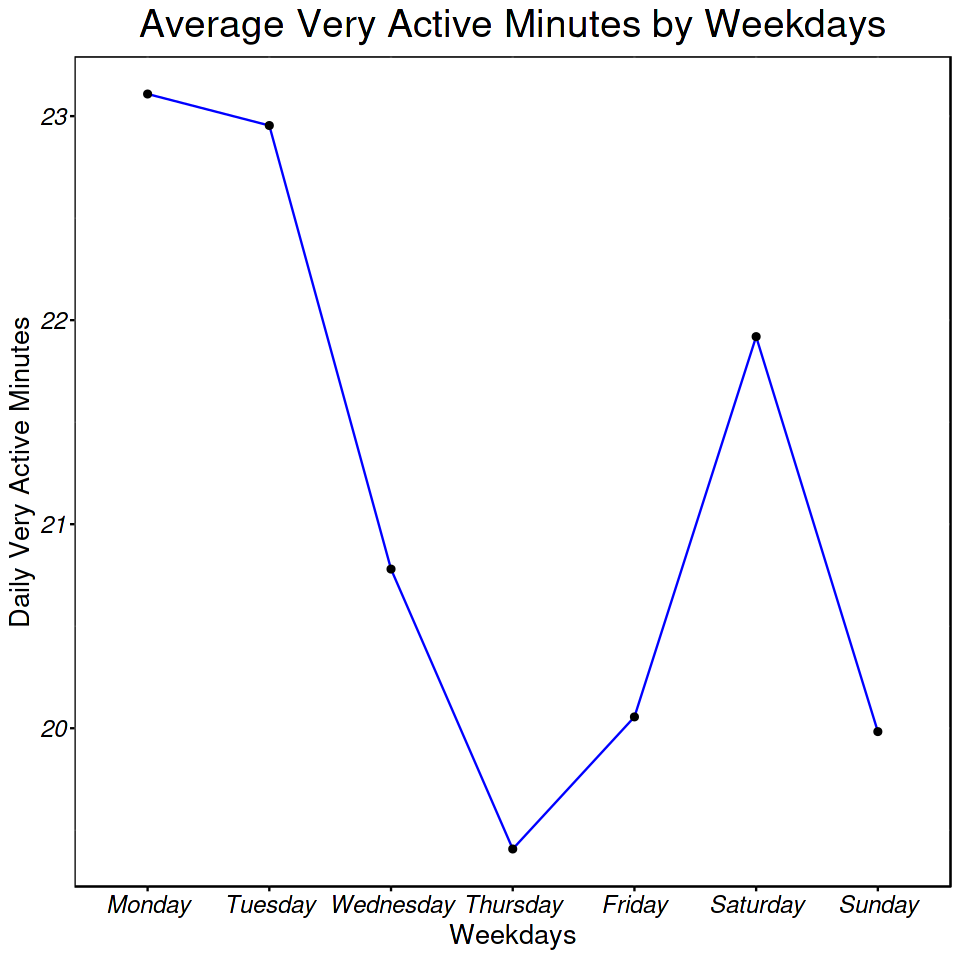

In [14]:
options(repr.plot.width=8, repr.plot.height=8)
ggplot(daily_Activity_minutes_active, aes(x=weekday,y=mean_veryactive, group=1))+
  geom_line(color = "blue")+ geom_point()+
  labs(title="Average Very Active Minutes by Weekdays", x= "Weekdays", y="Daily Very Active Minutes")+ custom_theme()



Reviewing activity levels, we can see the overall trend in user's activity:
* Activity level are high on Monday and Tuesday
* Activity level are high on Thursday and Sunday

Users starts off the week active and slow down in the mid. This might be due to the busy schedule, they feel tired. While on saturday, high activity level is observed, which could due to the weekend and users spending time outdoors.
Let's now analyse further about daily activity time.

Loading required package: gridExtra


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




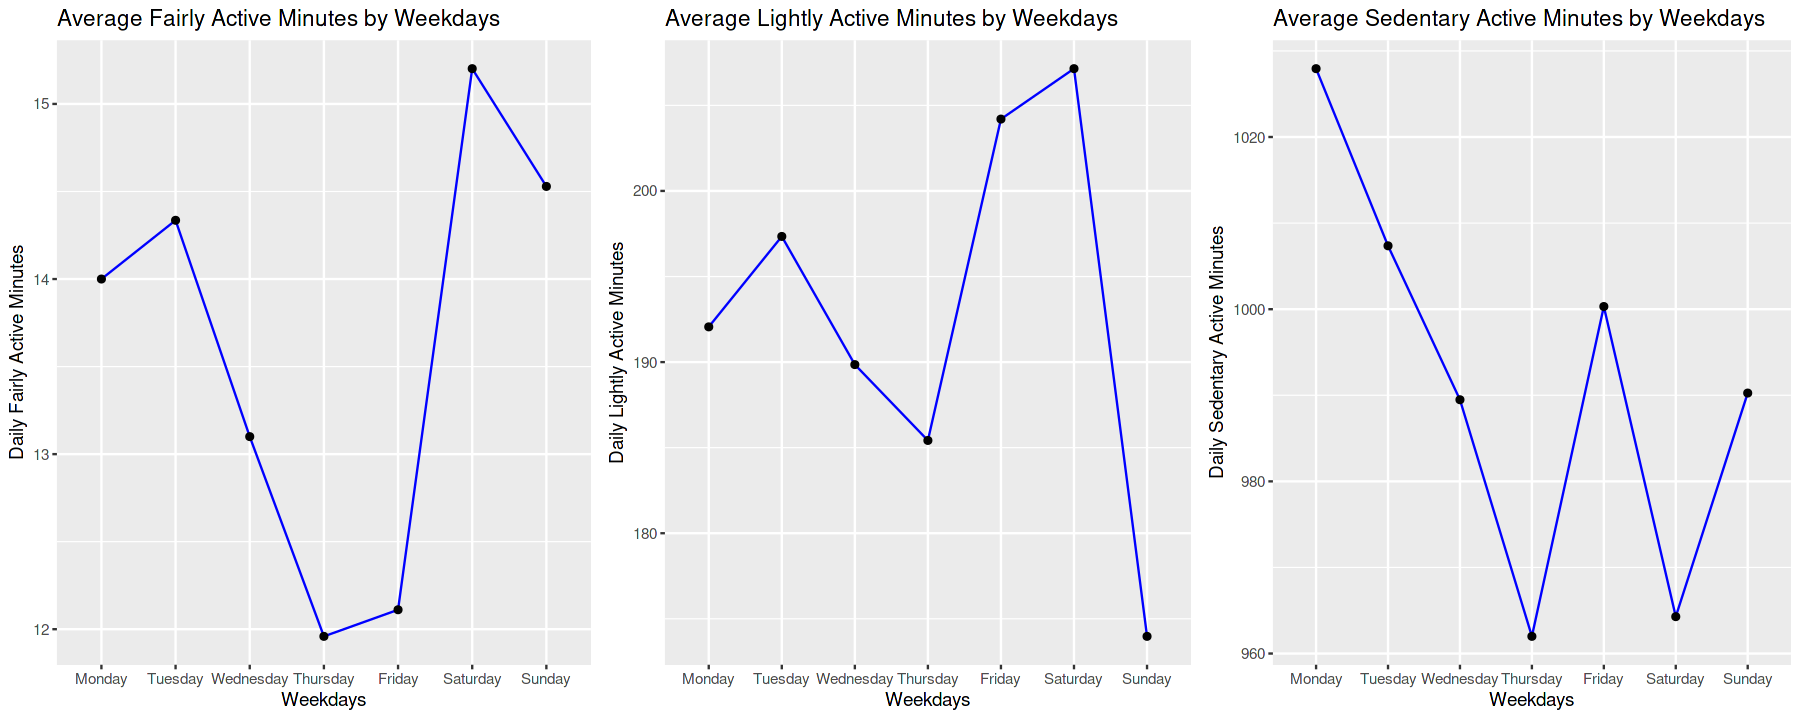

In [15]:
require(gridExtra)

options(repr.plot.width=15, repr.plot.height=6)
p2<-ggplot(daily_Activity_minutes_active, aes(x=weekday,y=mean_fairlyactive, group=1))+
  geom_line(color = "blue")+ geom_point()+
  labs(title="Average Fairly Active Minutes by Weekdays", x= "Weekdays", y="Daily Fairly Active Minutes")

p3<-ggplot(daily_Activity_minutes_active, aes(x=weekday,y=mean_lightlyactive, group=1))+
  geom_line(color = "blue")+ geom_point()+
  labs(title="Average Lightly Active Minutes by Weekdays", x= "Weekdays", y="Daily Lightly Active Minutes")

p4<-ggplot(daily_Activity_minutes_active, aes(x=weekday,y=mean_sedentaryactive, group=1))+
  geom_line(color = "blue")+ geom_point()+
  labs(title="Average Sedentary Active Minutes by Weekdays", x= "Weekdays", y="Daily Sedentary Active Minutes")

grid.arrange(p2,p3,p4, ncol=3)

options(repr.plot.width=15, repr.plot.height=6)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



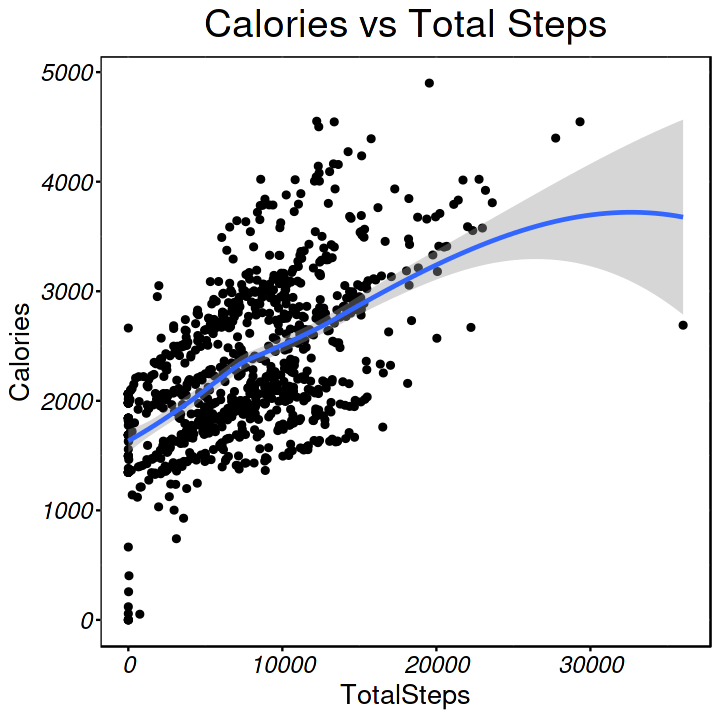

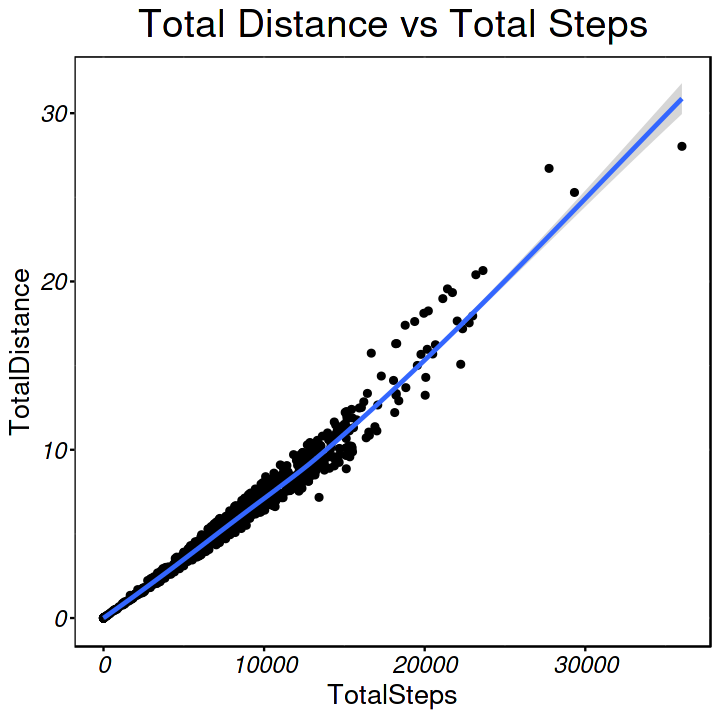

In [16]:
options(repr.plot.width = 6, repr.plot.height = 6)
ggplot(data = daily_Activity,aes(x = TotalSteps, y = Calories))+geom_point()+geom_smooth()+ labs(title="Calories vs Total Steps")+custom_theme()

ggplot(data = daily_Activity, aes(x = TotalSteps, y = TotalDistance))+geom_point()+geom_smooth()+ labs(title="Total Distance vs Total Steps")+custom_theme()

In [17]:
str(hourly_Activity)

'data.frame':	22099 obs. of  9 variables:
 $ Id              : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityHour    : POSIXct, format: "2016-04-12 01:00:00" "2016-04-12 13:00:00" ...
 $ Calories        : num  61 66 99 65 76 81 81 73 59 110 ...
 $ TotalIntensity  : num  8 6 29 9 12 21 20 11 7 36 ...
 $ AverageIntensity: num  0.133 0.1 0.483 0.15 0.2 ...
 $ StepTotal       : num  160 221 676 89 360 ...
 $ Date            : chr  "04/12/16" "04/12/16" "04/12/16" "04/12/16" ...
 $ Time            : chr  "01" "13" "10" "22" ...
 $ Day             : chr  "Tuesday" "Tuesday" "Tuesday" "Tuesday" ...


Now, let's analyse at what time any user is most active in a day

`summarise()` has grouped output by 'Day'. You can override using the `.groups` argument.



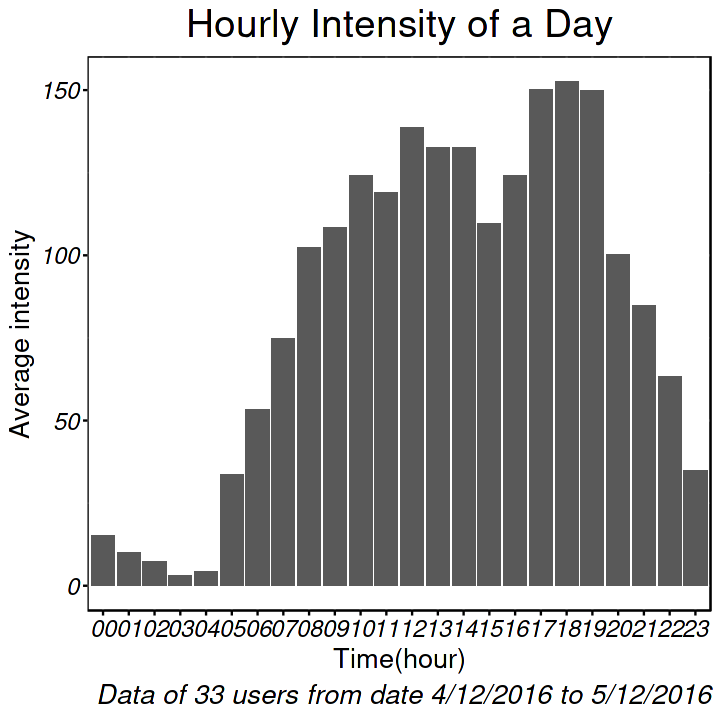

In [18]:
hourly_Activity_s <- hourly_Activity %>%
  group_by(Day,Time) %>%
  drop_na() %>%
  summarise(mean_TotalIntensity = mean(TotalIntensity))

ggplot(data=hourly_Activity_s) +
  geom_col(mapping = aes(x = Time, y=mean_TotalIntensity)) +
  labs(title="Hourly Intensity of a Day",
        caption = paste0("Data of 33 users from date 4/12/2016 to 5/12/2016"), 
       x="Time(hour)",
       y="Average intensity") +custom_theme()
    
options(repr.plot.width = 12, repr.plot.height = 6)

We can observe most of the people are active at the evening(around 5-7pm). People might be doing exercise at that time.
Let's now analyse how this trend varies through the week.

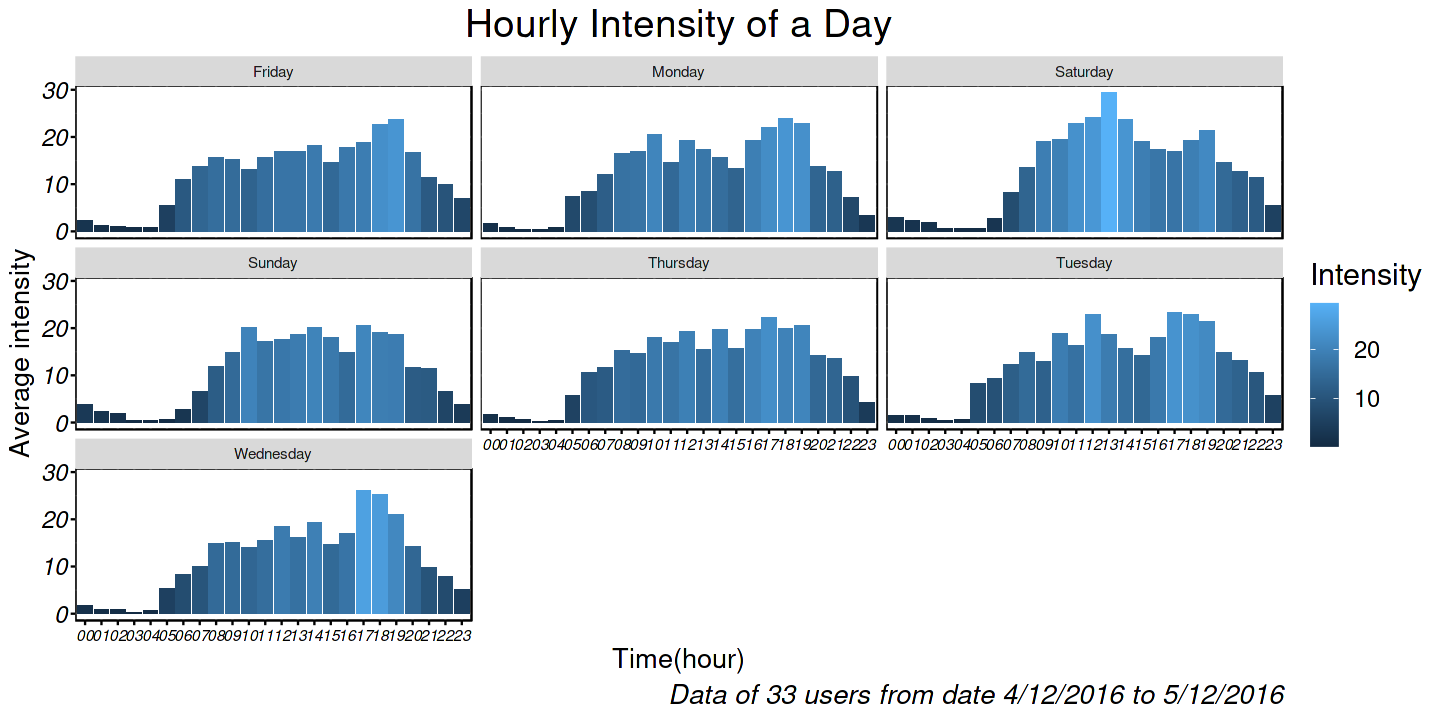

In [19]:
ggplot(data=hourly_Activity_s) +
  geom_col(mapping = aes(x = Time, y=mean_TotalIntensity, fill=mean_TotalIntensity)) +   facet_wrap(~Day) +
  labs(title="Hourly Intensity of a Day",
        caption = paste0("Data of 33 users from date 4/12/2016 to 5/12/2016"), 
       x="Time(hour)",
       y="Average intensity",fill="Intensity") +custom_theme()+
  theme(axis.text.x = element_text(size = 9))
    
options(repr.plot.width = 10, repr.plot.height = 10)

We can see that users usually exercise between 6pm and 7pm on weekdays. On Saturdays, they are very active around 1pm and are pretty active until 7pm. On Sunday, the activity level dropped significantly.
Let's now analyse, On which week day how active the users are.


In [20]:
daily_df <- merge(daily_Activity, sleep_day, by = c('Id', 'Date'), all.x = TRUE)
daily_df <- daily_df %>% drop_na()

head(daily_df)
n_distinct(daily_df$Id)

,Id,Date,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,⋯,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,weekday,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<chr>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dttm>,<dbl>,<dbl>,<dbl>
1,1503960366,04/12/16,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,⋯,25,13,328,728,1985,Tuesday,2016-04-12,1,327,346
2,1503960366,04/13/16,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,⋯,21,19,217,776,1797,Wednesday,2016-04-13,2,384,407
3,1503960366,04/15/16,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,⋯,29,34,209,726,1745,Friday,2016-04-15,1,412,442
4,1503960366,04/16/16,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,⋯,36,10,221,773,1863,Saturday,2016-04-16,2,340,367
5,1503960366,04/17/16,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,⋯,38,20,164,539,1728,Sunday,2016-04-17,1,700,712
6,1503960366,04/19/16,2016-04-19,15506,9.88,9.88,0,3.53,1.32,5.03,⋯,50,31,264,775,2035,Tuesday,2016-04-19,1,304,320


[1] 24

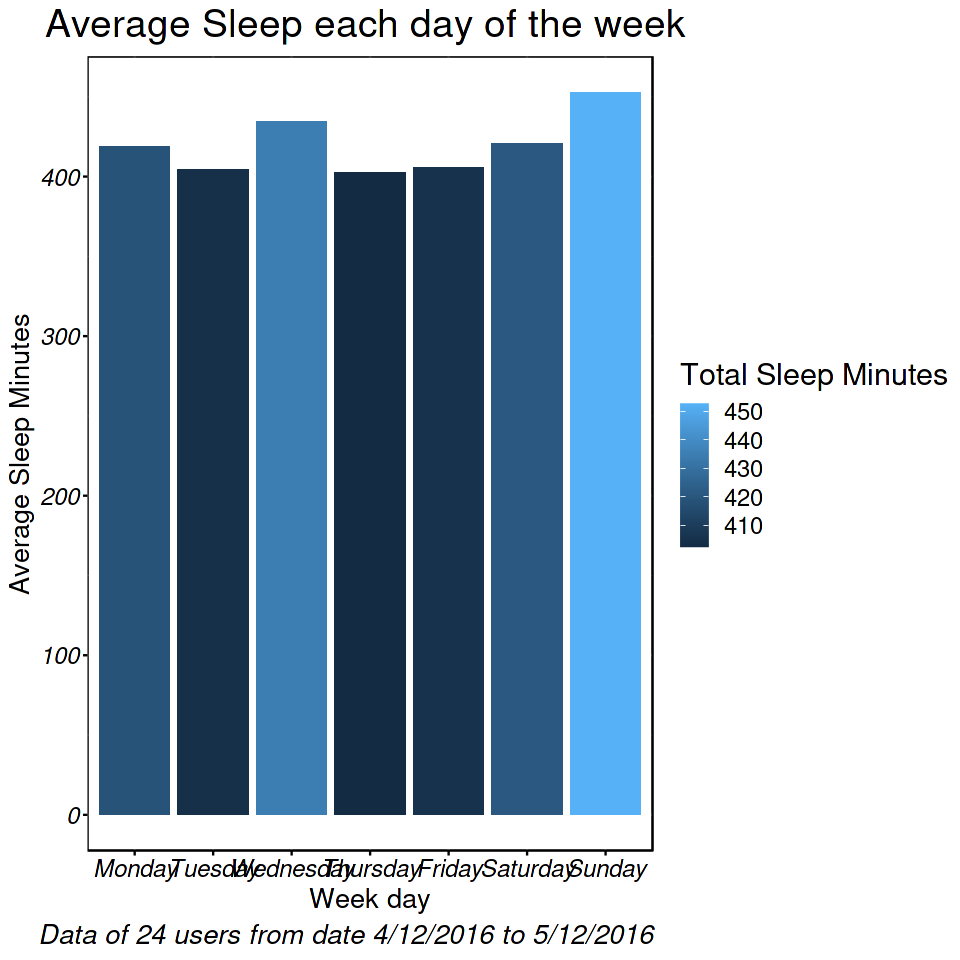

In [21]:
#Sleep minutes vs Week day
daily_df$weekday <- weekdays(daily_df$ActivityDate)
daily_df$weekday <- factor(daily_df$weekday, levels = c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday","Sunday"))
options(repr.plot.width = 8, repr.plot.height = 8)
daily_df_group_sleep <- daily_df %>%
  group_by(weekday) %>%
  drop_na() %>%
  summarise(mean_TotalMinutesAsleep = mean(TotalMinutesAsleep))

# daily_Activity_group_steps <- daily_Activity_group_steps[order(daily_Activity_group_steps)]
# daily_Activity_group_steps
ggplot(data = daily_df_group_sleep)+ geom_col(mapping = aes( x = weekday, y = mean_TotalMinutesAsleep, fill = mean_TotalMinutesAsleep))+
            labs(title = "Average Sleep each day of the week ", 
                 caption = paste0("Data of 24 users from date 4/12/2016 to 5/12/2016"), 
                 x="Week day", y = "Average Sleep Minutes", 
                 fill = "Total Sleep Minutes")+custom_theme()

We can observe that, people sleep more on weekends. Average of 400 mins i.e 6-7 hrs is maintained in working days. As per common recommendations, between 7-9 hrs of sleep is must. 


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



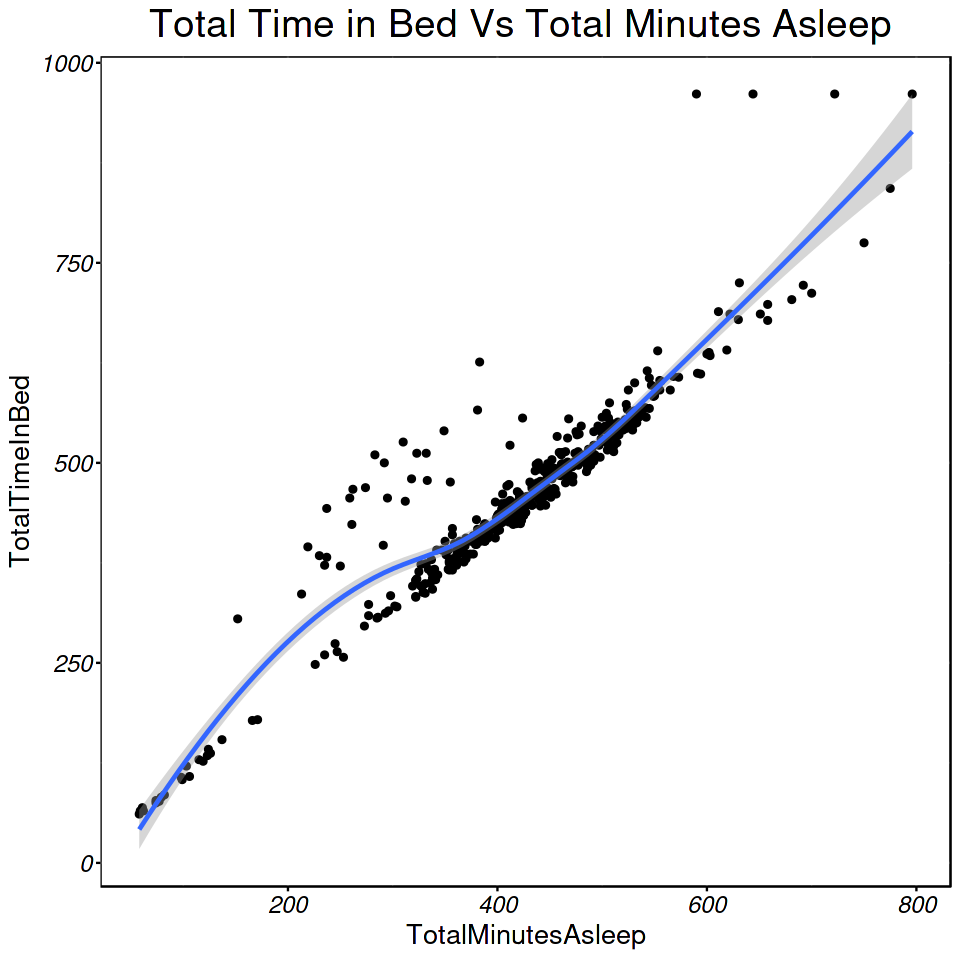

In [22]:
options(repr.plot.width = 8, repr.plot.height = 8)
#Total Time in bed & Sleep time correlation
ggplot(data=daily_df, aes(x=TotalMinutesAsleep, y=TotalTimeInBed)) + 
  geom_point()+geom_smooth()+ labs(title="Total Time in Bed Vs Total Minutes Asleep ")+custom_theme()
    

The relationship between Total Minutes Asleep and Total Time in Bed seems to be linear. **So, if the Bellabeat app users want to improve their sleep hour, we should consider giving a notification via app to sleep at a specific time, set by the user.**

Based on this visual we can infer that there is some correlation between time asleep and time spent in bed. 
Based on this correlation, Bellabeat should set a reminder to encourage people to spend less time on bed. Though, there are some ouliers,showing that some of the people face struggle to sleep, even after spending long duration on bed. 

Here, **TotalTimeInBed** includes sleep time. Let's analyse extra time in bed and sleep time to know how correlated they are.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



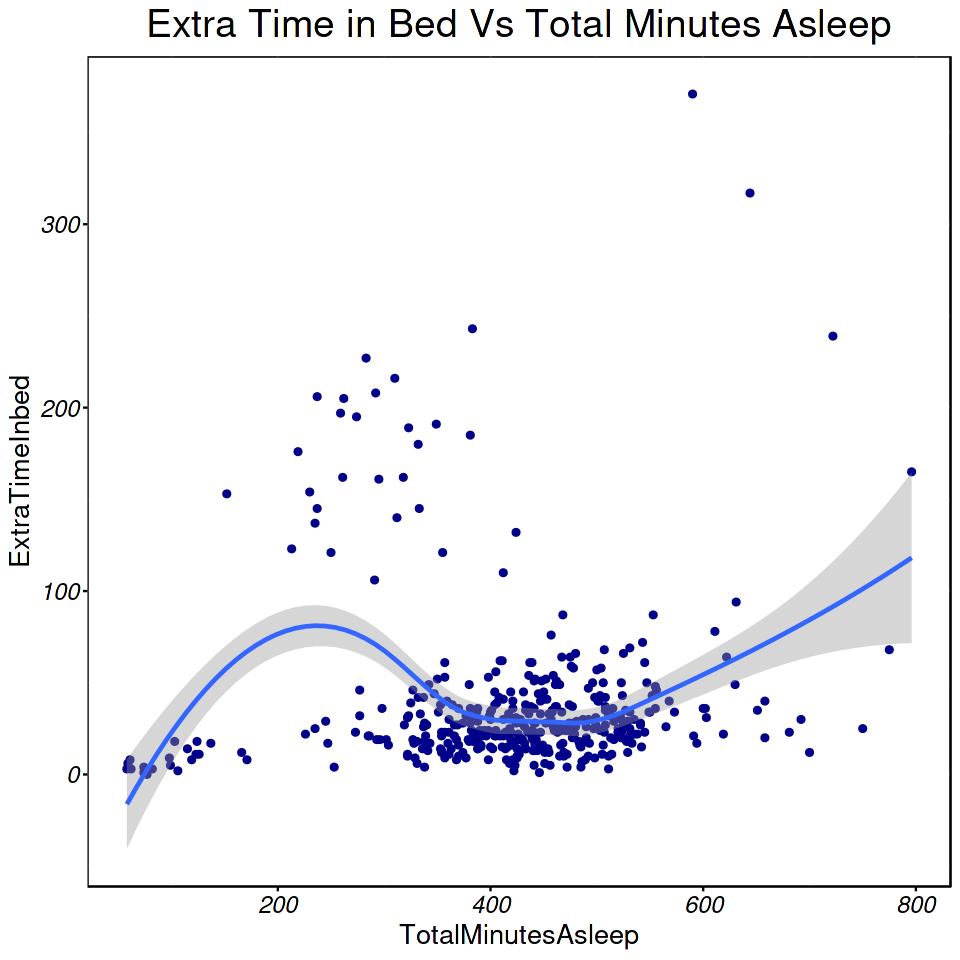

In [23]:
daily_df$ExtraTimeInbed <- daily_df$TotalTimeInBed- daily_df$TotalMinutesAsleep

ggplot(data=daily_df, aes(x=TotalMinutesAsleep, y=ExtraTimeInbed)) + 
  geom_point(color='darkblue')+geom_smooth()+ labs(title="Extra Time in Bed Vs Total Minutes Asleep")+custom_theme()

The above plot shows that majority of users spend atleast 30-60 mins in bed after or before sleep time. However, we can observe that some users spending time in bed more than half of sleep time, the reasons could be users might be working on bed, just scrolling phone, or having insomnia. Bellabeat should put up active reminders to ensure the user to stay productive and healthy.

Let's look at the relationship between Total Minutes Asleep and Sedentary Minutes.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



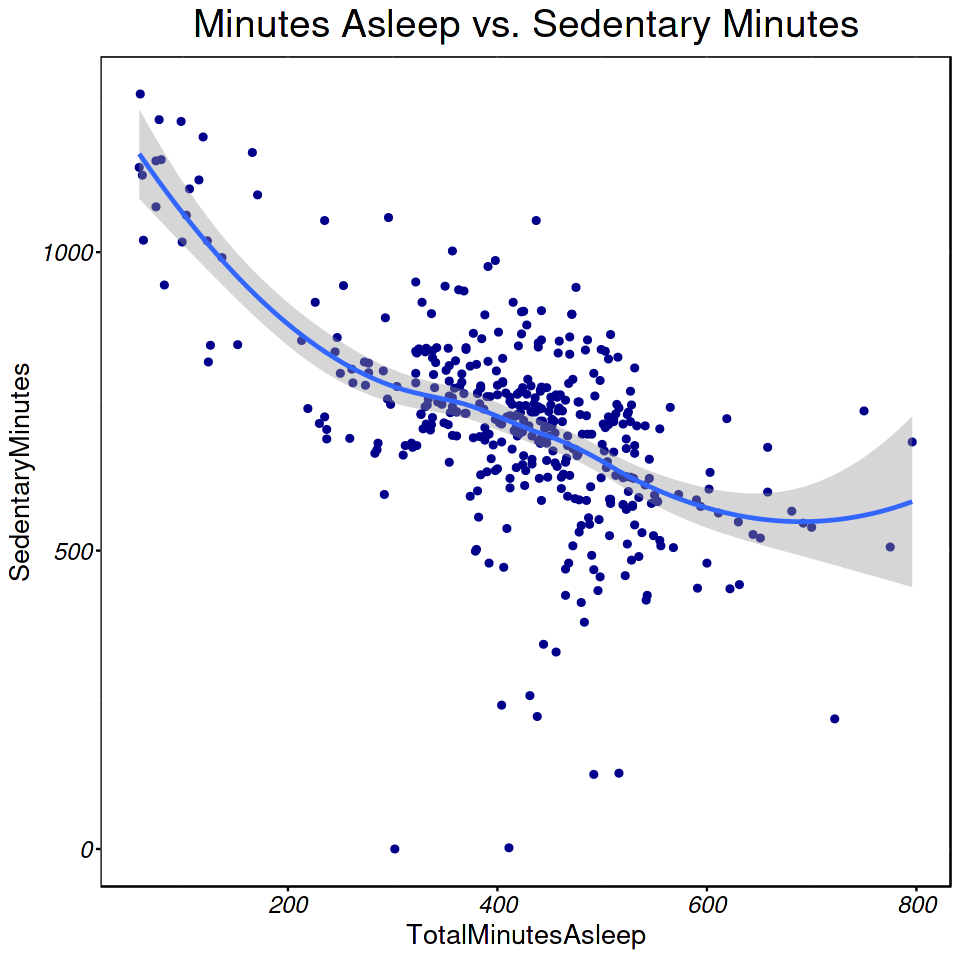

In [24]:
ggplot(data=daily_df, aes(x=TotalMinutesAsleep, y=SedentaryMinutes)) + 
geom_point(color='darkblue') + geom_smooth() +
  labs(title="Minutes Asleep vs. Sedentary Minutes")+custom_theme()

We can see the negative correlation between Sedentary Minutes and Sleep time. 
 So,**If the Bellabeat user want to improve their sleep, the app can recommend reducing the sedentary time**. 
Though, correlation doesn't always implies causation, we need to support this insight with more data.

### Recommendations
* Based on daily data plots, Bellabeat should provide rewards in order to hit daily steps target by  the users. Atleast 5000 steps in day is suggested, for that bellabeat notify users in certain intervals or at specific time like in morning and evening. 
* Since users are observed to be more sedentary in the day i.e, 9-5  which are office hours, they are often be sitting for hours. This can also raise some serious health issues in long run, Bellabeat should make active reminders which notify the users to take a walk and do some warm up excercises for every 2-4 hrs. 
* We can recommend giving drinking water reminders, which help user stay hydrated. Besides tracking only activities like steps, sleep time, weight and heartrates; Bellabeat can offer sessions on eating habits, yoga etc., more often.
* Based on sleep time analysis, Bellabeat should consider teaching some routine before sleep, which reduces the sedentary time in bed and struggle to sleep through their app. Oversleeping and Insufficient sleep have to monitored since both cause a more or less impact on rest of the day. Reminding users to sleep and wake up on time.
* Bellabeat spring and leaf products are suggested for users who work at home or from home. Unique products can be designed which can be able to track user's activity even if users are not consious about product around them and which are comfortable to use even during sleep.
* We observed a clear relation between higher intensity activity and calories burned so logging the activity with the an interative app/device could be a good motivator to increase your activity if any user has some kind of plan to lose weight.

**Tableau Visualization Work: https://bit.ly/bellabeat_tableau**
